# LSTM v 3.0

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Read the dataset
data = pd.read_csv('../../Data/Savitzky-Golay Data/SVG_poly1.csv')

In [2]:
data.head()

,Unnamed: 0,Year,Sunspot_Number
0,0,1818.001,34.566570
1,1,1818.004,34.546053
2,2,1818.007,34.525535
3,3,1818.010,34.505017
4,4,1818.012,34.484499


In [25]:
# Extract sunspot_count data
sunspot_data = data['Sunspot_Number'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
sunspot_normalized = scaler.fit_transform(sunspot_data)

# Create sequences of data to be used for training
sequence_length = 1000  # Adjust this value based on the dataset and problem complexity
X = []
y = []

for i in range(sequence_length, len(sunspot_normalized)):
    X.append(sunspot_normalized[i - sequence_length:i])
    y.append(sunspot_normalized[i])

X, y = np.array(X), np.array(y)

# Split the data into train and test sets
train_size = 65000
skips = 20
X_train, y_train = X[:train_size:skips], y[:train_size:skips]
X_test, y_test = X[train_size::skips], y[train_size::skips]

In [4]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
102/102 [==============================] - 10s 82ms/step - loss: 0.0061
Epoch 2/10
102/102 [==============================] - 10s 95ms/step - loss: 2.3738e-05
Epoch 3/10
102/102 [==============================] - 10s 97ms/step - loss: 1.6047e-05
Epoch 4/10
102/102 [==============================] - 10s 102ms/step - loss: 1.4970e-05
Epoch 5/10
102/102 [==============================] - 11s 106ms/step - loss: 1.3748e-05
Epoch 6/10
102/102 [==============================] - 10s 97ms/step - loss: 1.2979e-05
Epoch 7/10
102/102 [==============================] - 9s 84ms/step - loss: 1.2409e-05
Epoch 8/10
102/102 [==============================] - 8s 80ms/step - loss: 1.1666e-05
Epoch 9/10
102/102 [==============================] - 8s 77ms/step - loss: 1.0585e-05
Epoch 10/10
102/102 [==============================] - 8s 77ms/step - loss: 9.6877e-06


In [6]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 1s 28ms/step


In [7]:
predictions.shape

(440, 1)

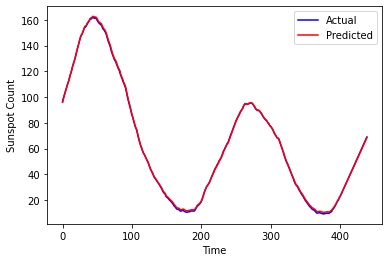

In [8]:
import matplotlib.pyplot as plt

# Create a range of indices for the x-axis
time_range = np.arange(len(y_test))

# Plot the actual test data
plt.plot(time_range, scaler.inverse_transform(y_test), label='Actual', color='blue')

# Plot the model's predictions
plt.plot(time_range, predictions, label='Predicted', color='red')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Sunspot Count')
plt.legend()

# Display the plot
plt.show()

In [58]:
initial_input = data['Sunspot_Number'][:train_size].values.reshape(-1,1)

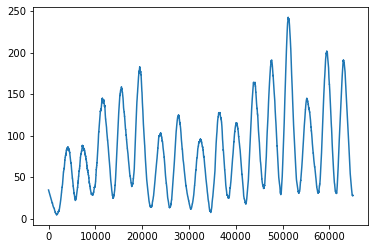

In [59]:
initial_input_scaled = scaler.transform(initial_input)

plt.plot(initial_input)

In [ ]:
num_future_predictions = 10000
future_predictions = []

input_sequence = initial_input_scaled.reshape(1, train_size, 1)

for _ in range(num_future_predictions):
    # Make a prediction using the current input sequence
    prediction = model.predict(input_sequence)

    # Inverse transform the prediction
    prediction_inverse = scaler.inverse_transform(prediction)

    # Add the prediction to the future predictions list
    future_predictions.append(prediction_inverse[0, 0])

    # Update the input sequence by adding the new prediction and removing the oldest value
    input_sequence[0, :-1, 0] = input_sequence[0, 1:, 0]
    input_sequence[0, -1, 0] = prediction[0, 0]


1/1 [==============================] - 1s 617ms/step


In [ ]:
import matplotlib.pyplot as plt

time_range = np.arange(len(data), len(data) + num_future_predictions)

plt.plot(time_range, future_predictions, label='Future Predictions', color='red')
plt.plot(data['Sunspot_Number'].values) 

plt.xlabel('Time')
plt.ylabel('Sunspot Count')
plt.legend()
plt.show()
